In [13]:
import matplotlib.pyplot as plt

from keras.models import load_model

# Custom classes
from preprocessor import Preprocessor
from training_engine import TrainingEngine
from reporting import Reporting

In [14]:
preprocessor = Preprocessor()
training_engine = TrainingEngine()
reporting = Reporting()

In [22]:
filename = "trained_model/lb5_e300_lvl_32_16_op_adam_model.h5"
look_back = 5
no_of_records = -1

trainX, trainY, testX, testY, data, delta = preprocessor.prepare_multistock_data_with_rsi(no_of_records, look_back)
model = load_model(filename)
data, trainPredict, trainY, testPredict, testY = training_engine.predict(model, data, delta, trainX, testX, trainY, testY, look_back)

Preparing data with look back 5
No of rows loaded 3590


In [23]:
print_start = 2900
print_window = 3000

trainScore, testScore = reporting.calculate_rmse(trainPredict, trainY, testPredict, testY)

Train Score: 0.78 RMSE
Test Score: 0.91 RMSE


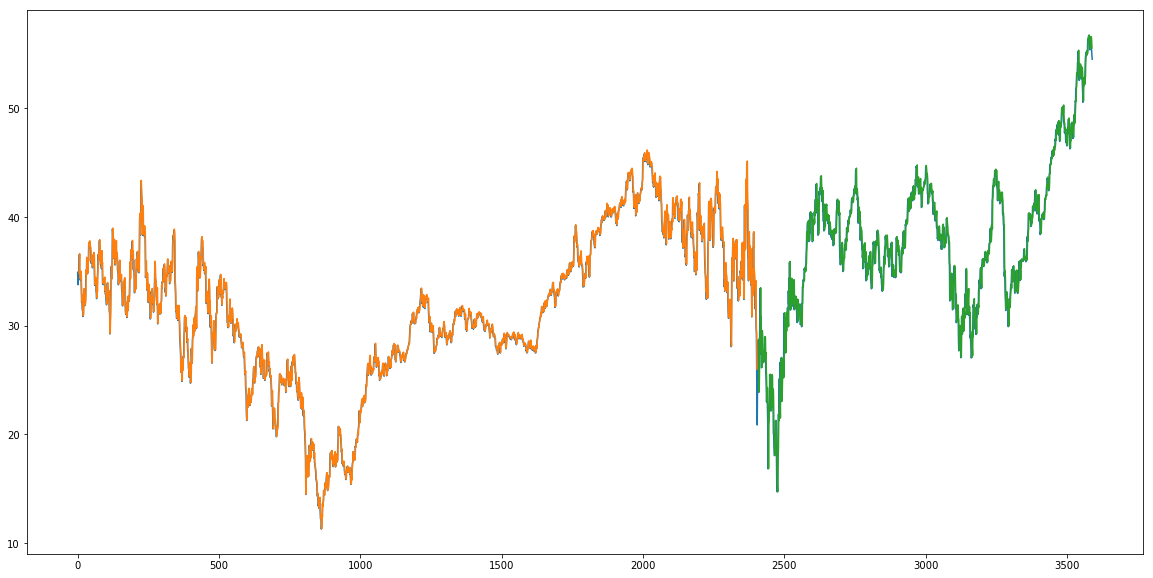

In [24]:
start = 0
end = -1

reporting.print_results(data, trainPredict, trainY, testPredict, testY, look_back, start, end)